In [1]:
import pandas as pd

features = pd.read_csv('features1')

# features = features.drop(features.columns[0], axis=1)
features = features.drop(features.columns[0], axis=1)
print('shape', features.shape)
print('describe', features.describe())

print(features)

shape (21, 11)
describe          obj_num   box_area  mask_area  avg_score       avg_x1       avg_y1  \
count  21.000000  21.000000  21.000000  21.000000    21.000000    21.000000   
mean    5.380952   0.313335   0.202044   0.714795   394.678896   738.947127   
std    12.455827   0.377170   0.261586   0.362223   276.468639   318.625989   
min     0.000000   0.000000   0.000000   0.000000     0.000000    17.000000   
25%     1.000000   0.008362   0.005723   0.755230   184.000000   582.000000   
50%     2.000000   0.108214   0.074081   0.856244   446.000000   804.250000   
75%     3.000000   0.580952   0.283138   0.914556   540.000000   980.000000   
max    57.000000   1.031106   0.874060   0.999272  1005.000000  1387.500000   

            avg_x2       avg_y2    avg_width   avg_height       prob  
count    21.000000    21.000000    21.000000    21.000000  21.000000  
mean    778.193452  1158.982315   383.514556   420.035187   0.546798  
std     232.045049   310.104553   360.855131   532.

In [2]:
features = pd.get_dummies(features)

print(features.columns)

Index(['obj_num', 'box_area', 'mask_area', 'avg_score', 'avg_x1', 'avg_y1',
       'avg_x2', 'avg_y2', 'avg_width', 'avg_height', 'prob'],
      dtype='object')


In [3]:
import numpy as np

labels = np.array(features['prob'])

features= features.drop('prob', axis = 1)


feature_list = list(features.columns)
features = np.array(features)

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [5]:
# # The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('box_area')]

# # Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
# print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [6]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 1)

rf.fit(train_features, train_labels);

In [7]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2))
print(predictions[:])
print(test_labels[:])

Mean Absolute Error: 0.25
[0.60210345 0.36144138 0.43327849 0.47911379 0.64188046 0.43327849]
[0.87931034 0.44827586 0.75862069 0.82758621 0.27586207 0.36206897]


In [8]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 51.96 %.


In [9]:
# # Import tools needed for visualization
# from sklearn.tree import export_graphviz
# import pydot
# # Pull out one tree from the forest
# tree = rf.estimators_[5]
# # Export the image to a dot file
# export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# # Use dot file to create a graph
# (graph, ) = pydot.graph_from_dot_file('tree.dot')

# # Write graph to a png file
# graph.write_png('tree.png')

In [10]:
# # Limit depth of tree to 3 levels
# rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
# rf_small.fit(train_features, train_labels)
# # Extract the small tree
# tree_small = rf_small.estimators_[5]
# # Save the tree as a png image
# export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
# graph.write_png('small_tree.png');

In [11]:
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_y2               Importance: 0.24
Variable: avg_y1               Importance: 0.18
Variable: avg_score            Importance: 0.12
Variable: avg_x1               Importance: 0.1
Variable: avg_x2               Importance: 0.09
Variable: obj_num              Importance: 0.08
Variable: box_area             Importance: 0.08
Variable: mask_area            Importance: 0.05
Variable: avg_width            Importance: 0.04
Variable: avg_height           Importance: 0.03


Text(0.5, 1.0, 'Variable Importances')

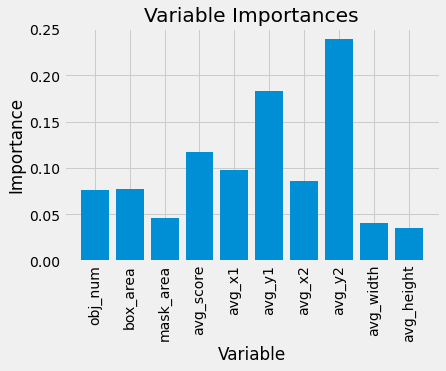

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')

plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

[0.87931034 0.44827586 0.75862069 0.82758621 0.27586207 0.36206897]
[0.60210345 0.36144138 0.43327849 0.47911379 0.64188046 0.43327849]


Text(0.5, 1.0, 'Actual and Predicted Values')

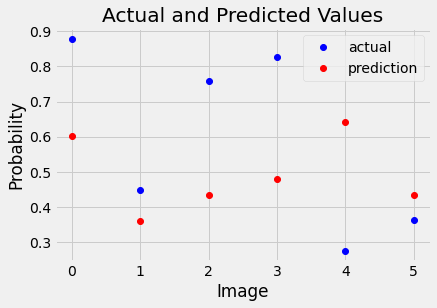

In [13]:
numlist=range(0,len(predictions),1)
print(test_labels)
print(predictions)
true_data = pd.DataFrame(data = {'image': numlist, 'actual': test_labels})
predictions_data = pd.DataFrame(data = {'image': numlist, 'prediction': predictions})

plt.plot(true_data.index, true_data['actual'], 'bo', label = 'actual')
plt.plot(predictions_data.index, predictions_data['prediction'], 'ro', label = 'prediction')
plt.legend()

plt.xlabel("Image")
plt.ylabel('Probability')
plt.title('Actual and Predicted Values')

In [14]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(test_labels, predictions)
rmse = math.sqrt(mse)
print('Accuracy for Random Forest',100*max(0,rmse)) 

Accuracy for Random Forest 27.407563433766303
